{0: 0.9998487598306111, 1: 0.9991638795986622, 2: 0.9740506329113924, 3: 0.990693739424704, 4: 0.9942401960784314, 5: 0.9936440677966102, 6: 0.9973987365291712, 7: 0.9940517241379311, 8: 1.0, 9: 0.9674533195020747, 10: 0.5, 11: nan, 12: 0.7387118193891102}


D:\Anaconda3\envs\iot\lib\site-packages\sklearn\multiclass.py:79: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
D:\Anaconda3\envs\iot\lib\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


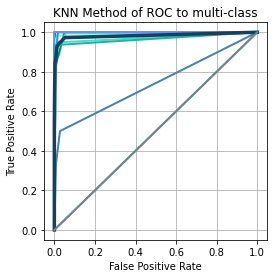

In [43]:
import pandas as pd
import sklearn
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import linear_model, preprocessing
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from interpolation import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('train_adjust.csv')
#print(data.head())

le = preprocessing.LabelEncoder()
event = le.fit_transform(list(data['event']))
M35 = le.fit_transform(list(data['M35']))
AD1A = le.fit_transform(list(data['AD1-A']))
M34 = le.fit_transform(list(data['M34']))
M32 = le.fit_transform(list(data['M32']))
M33 = le.fit_transform(list(data['M33']))
M36 = le.fit_transform(list(data['M36']))
M30 = le.fit_transform(list(data['M30']))
M29 = le.fit_transform(list(data['M29']))
M37 = le.fit_transform(list(data['M37']))
M38 = le.fit_transform(list(data['M38']))
M39 = le.fit_transform(list(data['M39']))
M41 = le.fit_transform(list(data['M41']))
M40 = le.fit_transform(list(data['M40']))
M31 = le.fit_transform(list(data['M31']))
M10 = le.fit_transform(list(data['M10']))
M14 = le.fit_transform(list(data['M14']))
M16 = le.fit_transform(list(data['M16']))
M15 = le.fit_transform(list(data['M15']))
M17 = le.fit_transform(list(data['M17']))
M51 = le.fit_transform(list(data['M51']))
M18 = le.fit_transform(list(data['M18']))
AD1B = le.fit_transform(list(data['AD1-B']))
M09 = le.fit_transform(list(data['M09']))
D08 = le.fit_transform(list(data['D08']))
M45 = le.fit_transform(list(data['M45']))
M47 = le.fit_transform(list(data['M47']))
M48 = le.fit_transform(list(data['M48']))
M28 = le.fit_transform(list(data['M28']))
M27 = le.fit_transform(list(data['M27']))
M46 = le.fit_transform(list(data['M46']))
M49 = le.fit_transform(list(data['M49']))
M23 = le.fit_transform(list(data['M23']))
M19 = le.fit_transform(list(data['M19']))
M42 = le.fit_transform(list(data['M42']))
M08 = le.fit_transform(list(data['M08']))
M43 = le.fit_transform(list(data['M43']))
M13 = le.fit_transform(list(data['M13']))
M50 = le.fit_transform(list(data['M50']))
D14 = le.fit_transform(list(data['D14']))
M21 = le.fit_transform(list(data['M21']))
L11 = le.fit_transform(list(data['L11']))
M06 = le.fit_transform(list(data['M06']))
L06 = le.fit_transform(list(data['L06']))
M24 = le.fit_transform(list(data['M24']))
M25 = le.fit_transform(list(data['M25']))
AD1C = le.fit_transform(list(data['AD1-C']))
D15 = le.fit_transform(list(data['D15']))
D09 = le.fit_transform(list(data['D09']))
M07 = le.fit_transform(list(data['M07']))
M02 = le.fit_transform(list(data['M02']))
D10 = le.fit_transform(list(data['D10']))
I03 = le.fit_transform(list(data['I03']))
D07 = le.fit_transform(list(data['D07']))
M20 = le.fit_transform(list(data['M20']))
M11 = le.fit_transform(list(data['M11']))
D05 = le.fit_transform(list(data['D05']))
M05 = le.fit_transform(list(data['M05']))
M04 = le.fit_transform(list(data['M04']))
D03 = le.fit_transform(list(data['D03']))
M26 = le.fit_transform(list(data['M26']))
M01 = le.fit_transform(list(data['M01']))
M12 = le.fit_transform(list(data['M12']))
M03 = le.fit_transform(list(data['M03']))
M22 = le.fit_transform(list(data['M22']))
L09 = le.fit_transform(list(data['L09']))
D12 = le.fit_transform(list(data['D12']))
L10 = le.fit_transform(list(data['L10']))
L13 = le.fit_transform(list(data['L13']))
L12 = le.fit_transform(list(data['L12']))
L04 = le.fit_transform(list(data['L04']))

predict = 'action'
X = list(zip(M35, AD1A, M34, M32, M33, M36, M30, M29, M37, M38, M39, M41, M40, M31, M10, M14, M16, M15, M17, M51, M18, AD1B, M09, D08, M45,
             M47,M48,M28,M27,M46,M49,M23,M19,M42,M08,M43,M13,M50,D14,M21,L11,M06,L06,M24,M25,AD1C,D15,D09,M07,M02,D10,I03,D07,M20,M11,D05,
             M05,M04,D03,M26,M01,M12,M03,M22,L09,D12,L10,L13,L12,L04))
y = event

#make label binary
y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12])
#set classes
n_classes = y.shape[1]
X = np.array(X)
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.5, random_state=0)
#print(x_train, y_test)
#记得改模型
#classifier = OneVsRestClassifier(LogisticRegression(penalty='l2', random_state=0))
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
#classifier = OneVsRestClassifier(RandomForestClassifier(max_depth=7, n_estimators=100))
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7))
#OneVsRestClassifier(svm.SVC(kernel='linear', probability=True)或者 RandomForestClassifier(max_depth=7, n_estimators=100)或者 KNeighborsClassifier(n_neighbors=7))
y_score = classifier.fit(x_train,y_train).predict_proba(x_test)

#calculate ROC of each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc)
# compute micro-average ROC curve and ROC area
fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])
#########################################################################################
#plot all ROC
lw = 2
plt.figure(figsize=(4,4))

colors = ['royalblue','lightsteelblue','turquoise','aquamarine','lightblue','darkcyan','dodgerblue','mediumaquamarine','cornflowerblue','lightseagreen','deepskyblue','teal','steelblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f}'
             ''.format(i, roc_auc[i]))

plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc['micro']),
         color = '#173F5F', linestyle='solid', linewidth = 3.5)

plt.plot([0,1], [0,1], 'gray', lw=lw)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#记得改标题
#plt.title('LR Method of ROC to multi-class')
#plt.title('SVM Method of ROC to multi-class')
#plt.title('RF Method of ROC to multi-class')
plt.title('KNN Method of ROC to multi-class')
#plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc.svg')